## Solving an ODE using the Chebyshev spectral method

This notebook uses the module `chebyspectral.py` which contains functions for the computation of spectral coefficients and differentiation matrices. 

The differential equation to be solved is
$$ \frac{d^2u}{dx^2} -4\frac{du}{dx} + 4u = e^x -\frac{4e}{1+e^2} $$
with $u\in [-1, 1]$ and boundary conditions

$ u(-1)=0 $ and $ u(1)=0 $.

First, we import the required modules

In [2]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from chebyspectral import *

The parameter that influences the precision of the approximation is `deg` and it defines the polynomial degree of the solution

In [3]:
deg = 16  # degree of Chebyshev polynomial

We use the Tau method to solve the ODE, which requires the conversion of the right-hand side to its spectral coefficients. This is easily done with the function `chebfit`

In [4]:
# Source term
C = -4*np.exp(1)/(1+np.exp(2))
s = lambda xq: np.exp(xq) + C
sTilde = chebfit(s, deg)

We can check how well `chebfit` approximated the function by converting it back to a function of x. This is done using the function `chebeval`

Text(0, 0.5, 'f(x)')

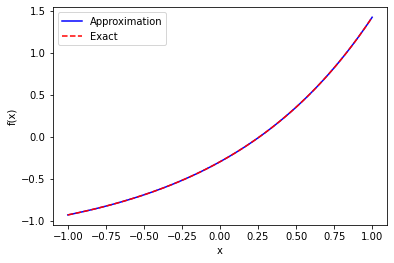

In [5]:
N = 100
x = np.linspace(-1, 1, N)

fig, ax = plt.subplots()
ax.plot(x,chebeval(sTilde, x),'b',label='Approximation')
ax.plot(x,s(x),'r--', label='Exact')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel('x')
plt.ylabel('f(x)')

Clearly the approximation is visually indiscernible from the original function.

Next we implement the boundary conditions. Each boundary condition will need to be supplied in the form of a list of the form

[`value`, `derivative order`, `position`, `axis`]

- `value` specifies the function value of the boundary condition. This can be a scalar (for ODEs) or a function (for PDEs).
- `derivarive order` specifies if the BC is of dirichlet type (0) or Neumann type (1). Here we only use dirichlet boundary conditions.
- `position` specifies the x value at which the boundary condition is applied, here x=-1 and x=1.
- `axis` specifies the independent parameter. Since this is an ODE, both values belong to the same axis.

In [6]:
# Boundary conditions
bc_value_1 = 0
bc_derivative_order_1 = 0  # Dirichlet (0th order derivative)
bc_position_1 = -1
bc_axis_1 = 0
bc_1 = [bc_value_1, bc_derivative_order_1, bc_position_1, bc_axis_1]

bc_value_2 = 0
bc_derivative_order_2 = 0 # Dirichlet
bc_position_2 = 1
bc_axis_2 = 0
bc_2 = [bc_value_2, bc_derivative_order_2, bc_position_2, bc_axis_2]

Next we compute the Chebyshev differentiation matrix. The function `chebdiff` automatically computes the matrix if we supply the coefficients of the linear operator in the variable `l_operator`. In the case of our ODE, this is 

$$ L = \frac{d^2}{dx^2} -4\frac{d}{dx} + 4 $$ which is encoded in `l_operator` as [4, -4, 1]. The first entry in the list corresponds to the coefficient of the 0th derivative, the second coefficient to the 1st derivative, and so on. After computing the differentiation matrix, we apply the previously defined boundary conditions to it using the function `chebbc`.

In [7]:
# Differentiation matrix
l_operator = [4, -4, 1]
L = chebdiff(l_operator, deg)
L, sTilde = chebbc(L, sTilde, [bc_1, bc_2])

What remains is to compute the spectral coefficients of the solution by inverting $L$ and multiplying it by the coefficients of the right-hand side, $\tilde{s}$.

In [8]:
# Compute solution
uTilde = np.dot(np.linalg.pinv(L), sTilde)

Using `chebeval` we can convert the coefficients back to a function of x and compare the spectral solution to the analytical solution. Again, the two solutions are visually indistinguishable as shown below.

Text(0, 0.5, 'f(x)')

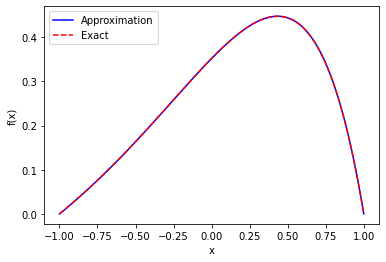

In [9]:
# Plot solution
fig, ax = plt.subplots()
ax.plot(x, chebeval(uTilde, x), 'b', label='Approximation')
ax.plot(x, np.exp(x)-np.sinh(1)/np.sinh(2)*np.exp(2*x) + C/4, 'r--', label='Exact')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel('x')
plt.ylabel('f(x)')